## Assignment:

# Customer Spending Analysis in an E-Commerce Store

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Load Dataset

In [4]:
df = pd.read_csv('ecommerce_customer_spending.csv')
print(df.head(16))

    Customer_ID  Age  Gender Product_Category  Purchase_Amount Purchase_Date  \
0             1   56    Male         Clothing             5986    2024-01-01   
1             2   46  Female         Clothing             8835    2024-01-02   
2             3   32  Female          Grocery             4991    2024-01-03   
3             4   25    Male         Clothing            11630    2024-01-04   
4             5   38  Female         Clothing             8151    2024-01-05   
5             6   56  Female         Clothing             1667    2024-01-06   
6             7   36  Female      Electronics             1562    2024-01-07   
7             8   40  Female      Electronics            19040    2024-01-08   
8             9   28    Male      Electronics            11674    2024-01-09   
9            10   28    Male          Grocery             5229    2024-01-10   
10           11   41  Female           Sports             9848    2024-01-11   
11           12   53  Female         Clo

### Understanding the Dataset Structure

In [16]:
print(df.info())
print("|-------|" * 6,"\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_ID       200 non-null    int64 
 1   Age               200 non-null    int64 
 2   Gender            200 non-null    object
 3   Product_Category  200 non-null    object
 4   Purchase_Amount   200 non-null    int64 
 5   Purchase_Date     200 non-null    object
 6   Payment_Mode      200 non-null    object
dtypes: int64(3), object(4)
memory usage: 11.1+ KB
None
|-------||-------||-------||-------||-------||-------| 

       Customer_ID         Age  Purchase_Amount
count   200.000000  200.000000       200.000000
mean    100.500000   38.665000      9856.760000
std      57.879185   12.604648      5411.387592
min       1.000000   18.000000       509.000000
25%      50.750000   27.750000      5383.500000
50%     100.500000   40.000000      9176.500000
75%     150.250000   49.250000   

In [20]:
print(df.shape)
print("|-------|" * 6,"\n")
print(df.isnull().sum())

(200, 7)
|-------||-------||-------||-------||-------||-------| 

Customer_ID         0
Age                 0
Gender              0
Product_Category    0
Purchase_Amount     0
Purchase_Date       0
Payment_Mode        0
dtype: int64


In [23]:
print(df.columns)
print("|-------|" * 6,"\n")
print(df.dtypes)

Index(['Customer_ID', 'Age', 'Gender', 'Product_Category', 'Purchase_Amount',
       'Purchase_Date', 'Payment_Mode'],
      dtype='object')
|-------||-------||-------||-------||-------||-------| 

Customer_ID          int64
Age                  int64
Gender              object
Product_Category    object
Purchase_Amount      int64
Purchase_Date       object
Payment_Mode        object
dtype: object


In [24]:
print(df.items())
print("|-------|" * 6,"\n")
print(df.sample(8))

<generator object DataFrame.items at 0x000001D48979D300>
|-------||-------||-------||-------||-------||-------| 

     Customer_ID  Age  Gender Product_Category  Purchase_Amount Purchase_Date  \
113          114   18  Female         Clothing            14050    2024-04-23   
126          127   32  Female          Grocery            15658    2024-05-06   
75            76   43  Female           Sports             8553    2024-03-16   
106          107   41  Female         Clothing            10636    2024-04-16   
107          108   54    Male          Grocery              509    2024-04-17   
87            88   41  Female           Beauty             4219    2024-03-28   
186          187   40    Male          Grocery             8441    2024-07-05   
76            77   42    Male      Electronics             3830    2024-03-17   

      Payment_Mode  
113  Bank Transfer  
126  Online Wallet  
75     Credit Card  
106           Cash  
107           Cash  
87   Online Wallet  
186      

In [26]:
print(df.nunique())
print("|-------|" * 6,"\n")
print(df.corr)

Customer_ID         200
Age                  42
Gender                2
Product_Category      5
Purchase_Amount     200
Purchase_Date       200
Payment_Mode          4
dtype: int64
|-------||-------||-------||-------||-------||-------| 

<bound method DataFrame.corr of      Customer_ID  Age  Gender Product_Category  Purchase_Amount Purchase_Date  \
0              1   56    Male         Clothing             5986    2024-01-01   
1              2   46  Female         Clothing             8835    2024-01-02   
2              3   32  Female          Grocery             4991    2024-01-03   
3              4   25    Male         Clothing            11630    2024-01-04   
4              5   38  Female         Clothing             8151    2024-01-05   
..           ...  ...     ...              ...              ...           ...   
195          196   23  Female      Electronics             6754    2024-07-14   
196          197   49  Female           Beauty            17644    2024-07-15   
1

In [29]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
print("Converted 'Purchase_Date' to datetime format:", df["Purchase_Date"].dtype)
print(df.dtypes)

Converted 'Purchase_Date' to datetime format: datetime64[ns]
Customer_ID                  int64
Age                          int64
Gender                      object
Product_Category            object
Purchase_Amount              int64
Purchase_Date       datetime64[ns]
Payment_Mode                object
dtype: object


### Part A – NumPy (Statistical Analysis)

In [ ]:
# 1. Convert relevant columns into NumPy arrays.
# 'Purchase_Amount' for calculations, 'Age' for grouping, and 'Gender' for comparison.
amount_np = df['Purchase_Amount'].values
age_np = df['Age'].values
gender_np = df['Gender'].values

In [208]:
# 2 Find: Mean, Median, and Standard Deviation of Purchase_Amount. Maximum and Minimum 
# purchase amount. Variance in spending behavior.

# Mean, Median, Standard Deviation
mean_spending = np.mean(amount_np)
median_spending = np.median(amount_np)
std_dev_spending = np.std(amount_np)

# Maximum and Minimum purchase amount
max_spending = np.max(amount_np)
min_spending = np.min(amount_np)

# Variance in spending behavior
variance_spending = np.var(amount_np)

In [37]:
print(f"Mean Purchase Amount: PKR {mean_spending:,.2f}")
print(f"Median Purchase Amount: PKR {median_spending: ,.1f}")
print(f"Standard Deviation: PKR {std_dev_spending:,.2f}")
print(f"Maximum Purchase Amount: PKR {max_spending:}")
print(f"Minimum Purchase Amount: PKR {min_spending:}")
print(f"Variance in Spending: {variance_spending:,.2f}")

Mean Purchase Amount: PKR 9,856.76
Median Purchase Amount: PKR  9,176.5
Standard Deviation: PKR 5,397.84
Maximum Purchase Amount: PKR 19956
Minimum Purchase Amount: PKR 509
Variance in Spending: 29,136,700.09


In [38]:
# 3. Identify which age group spends the most.
# We need to define age groups (bins) and group the data using Pandas/NumPy capabilities.
bins = [18, 26, 36, 46, 60]
labels = ['18-25', '26-35', '36-45', '46-60']

In [42]:
# Group by the new 'Age_Group' column and find the mean Purchase_Amount
spending_age = df.groupby('Age')['Purchase_Amount'].mean().sort_values(ascending=False)
mostSpending_group = spending_age.index[0]

In [47]:
print(f"\nAverage Spending by Age Group (Mean):")
print(spending_age.map('{:,.2f}'.format))
print("|-------|" * 6,"\n")
print(f"The age group that spends the most is: {mostSpending_group}")


Average Spending by Age Group (Mean):
Age
22    16,927.00
30    15,886.00
47    15,635.67
40    15,284.00
58    14,776.75
20    12,804.40
43    12,437.50
42    12,305.20
59    11,660.50
28    11,415.60
49    11,316.25
24    11,273.80
25    11,013.86
52    10,855.17
38    10,779.75
53    10,708.00
18    10,684.83
45    10,486.12
37    10,396.00
33    10,226.00
51     9,872.00
41     9,681.44
19     9,526.67
31     9,258.17
57     9,230.25
32     9,191.88
35     8,775.33
39     8,650.00
26     8,099.67
54     7,642.57
21     7,578.00
50     7,516.67
56     7,389.90
34     7,323.50
46     6,518.50
23     6,005.00
48     5,410.00
44     5,220.60
29     4,464.00
27     4,127.00
55     3,039.00
36     2,940.00
Name: Purchase_Amount, dtype: object
|-------||-------||-------||-------||-------||-------| 

The age group that spends the most is: 22


In [48]:
# 4. Compare average spending of Male vs Female customers:
avgSpending_gender = df.groupby('Gender')['Purchase_Amount'].mean()

print("\nAverage Spending by Gender:")
print(avgSpending_gender.map('{:,.2f}'.format))


Average Spending by Gender:
Gender
Female     9,588.08
Male      10,165.88
Name: Purchase_Amount, dtype: object


### Part B – Matplotlib (Visual Insights)


--- Part B: Matplotlib Visual Insights ---


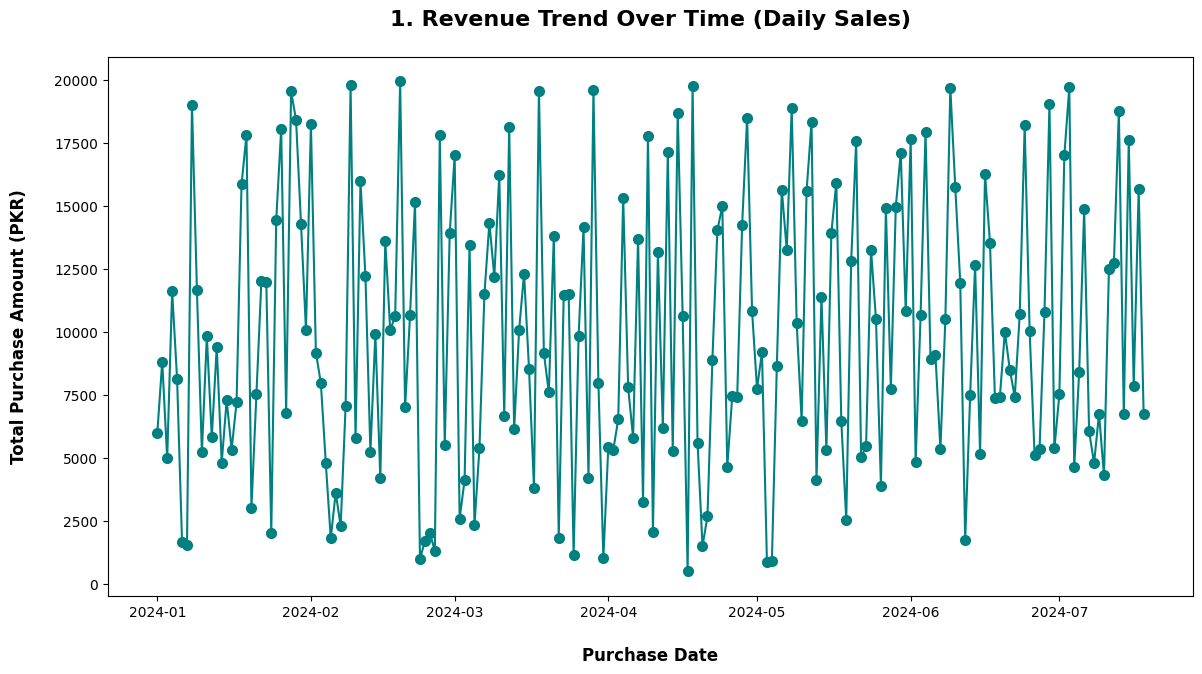

In [ ]:
print("\n--- Part B: Matplotlib Visual Insights ---")

# 1. Line Chart → Revenue trend over time.
# Aggregate data by purchase date (e.g., daily sales)

daily_rev = df.groupby('Purchase_Date')['Purchase_Amount'].sum().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(daily_rev['Purchase_Date'], daily_rev['Purchase_Amount'], 
         marker='o', color='teal', markersize= 7)

plt.title('1. Revenue Trend Over Time (Daily Sales)\n', fontsize=16, fontweight='bold')
plt.xlabel('\nPurchase Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Purchase Amount (PKR)\n', fontsize=12, fontweight='bold' )
plt.show()

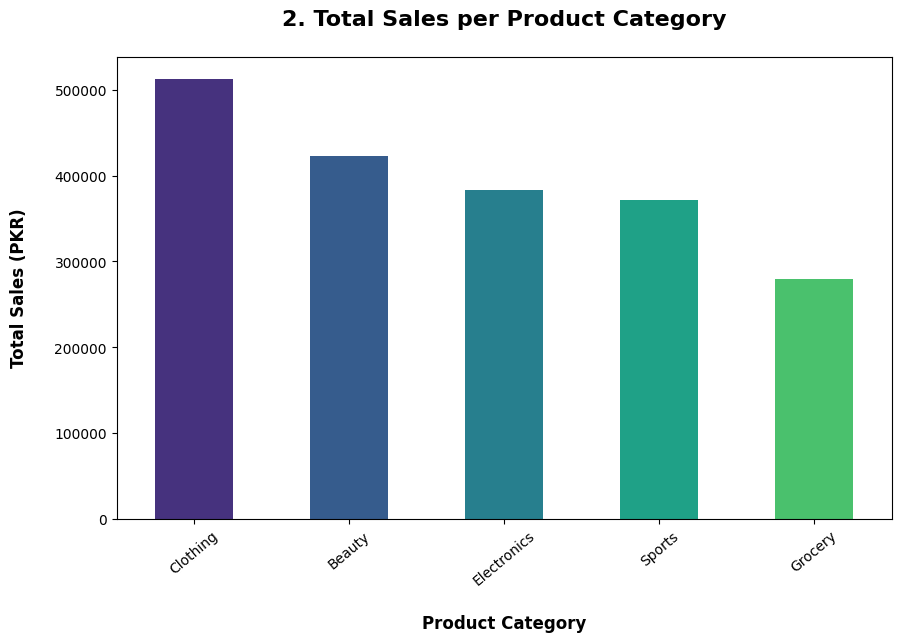

In [115]:
# 2. Bar Chart → Total sales per product category.
sales_by_category = df.groupby('Product_Category')['Purchase_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color=sns.color_palette("viridis"))

plt.title('2. Total Sales per Product Category\n', fontsize=16, fontweight='bold')
plt.xlabel('\nProduct Category', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (PKR)\n', fontsize=12, fontweight='bold')    
plt.xticks(rotation= 40)# you can also add rotation and text alignment as  : plt.xticks(rotation=45, ha='right')
plt.show()

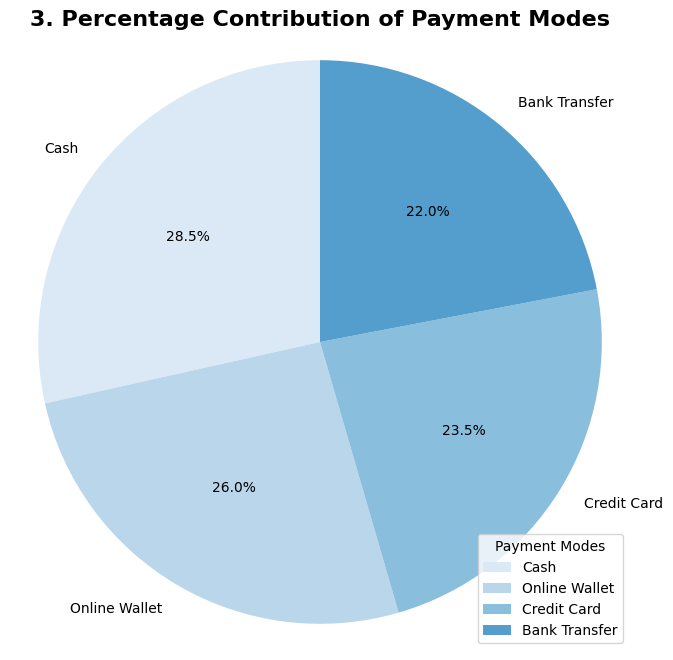

In [ ]:
# 3. Pie Chart → Percentage contribution of payment modes.
payment_contribution = df['Payment_Mode'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_contribution, labels=payment_contribution.index, 
        autopct='%1.1f%%', colors=sns.color_palette("Blues"),
        startangle=90) 

plt.title('3. Percentage Contribution of Payment Modes', fontsize=16, fontweight='bold')
plt.legend(title="Payment Modes", loc="best")
plt.axis('equal')     # Ensures the pie chart is circular
plt.show()

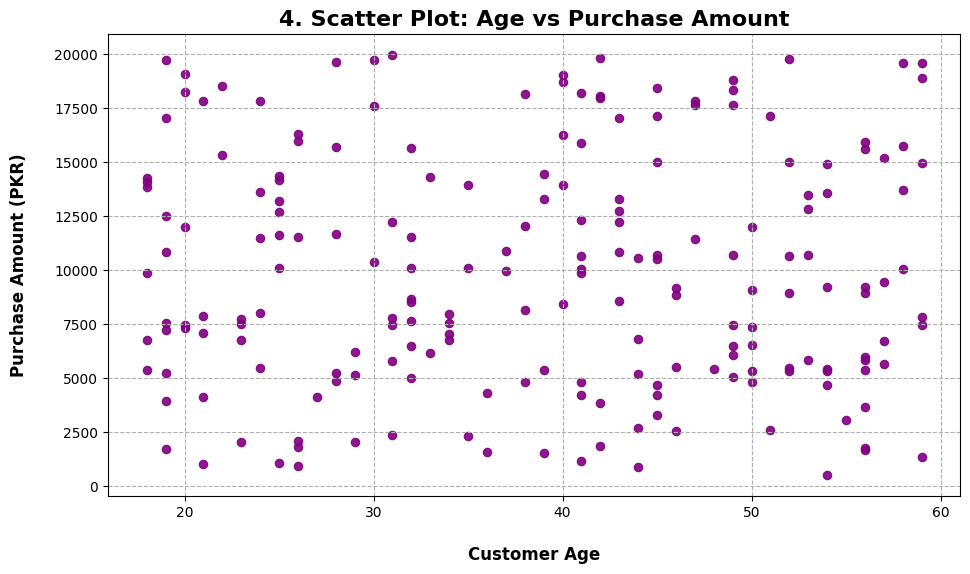

In [ ]:
# 4. Scatter Plot → Age vs Purchase Amount.
plt.figure(figsize=(11, 6))
plt.scatter(df['Age'], df['Purchase_Amount'], alpha=0.9, 
            color='purple', edgecolors='face', linewidth=0.9)

plt.title('4. Scatter Plot: Age vs Purchase Amount', fontsize=16, fontweight='bold')
plt.xlabel('\nCustomer Age', fontsize=12, fontweight='bold')
plt.ylabel('Purchase Amount (PKR)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--')
plt.show()

### Part C – Seaborn (Statistical Visualizations)



--- Part C: Seaborn Statistical Visualizations ---


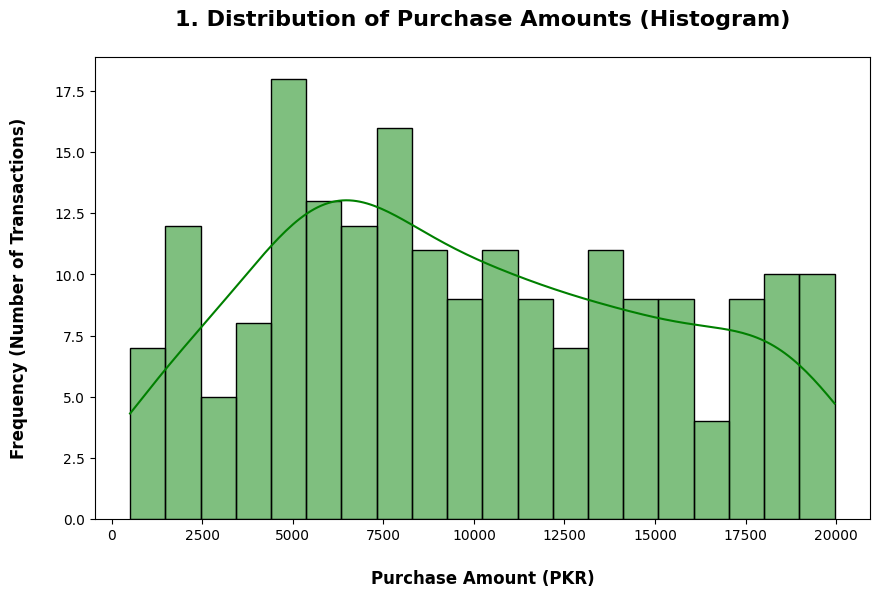

In [ ]:
print("\n\n--- Part C: Seaborn Statistical Visualizations ---")

# 1. Histogram → Distribution of purchase amounts.
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase_Amount'], kde=True, # Add a Kernel Density Estimate line
             bins=20, color='green', edgecolor='black')

plt.title('1. Distribution of Purchase Amounts (Histogram)\n', fontsize=16, fontweight='bold')
plt.xlabel('\nPurchase Amount (PKR)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (Number of Transactions)\n', fontsize=12, fontweight='bold')
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15252\888918810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender',


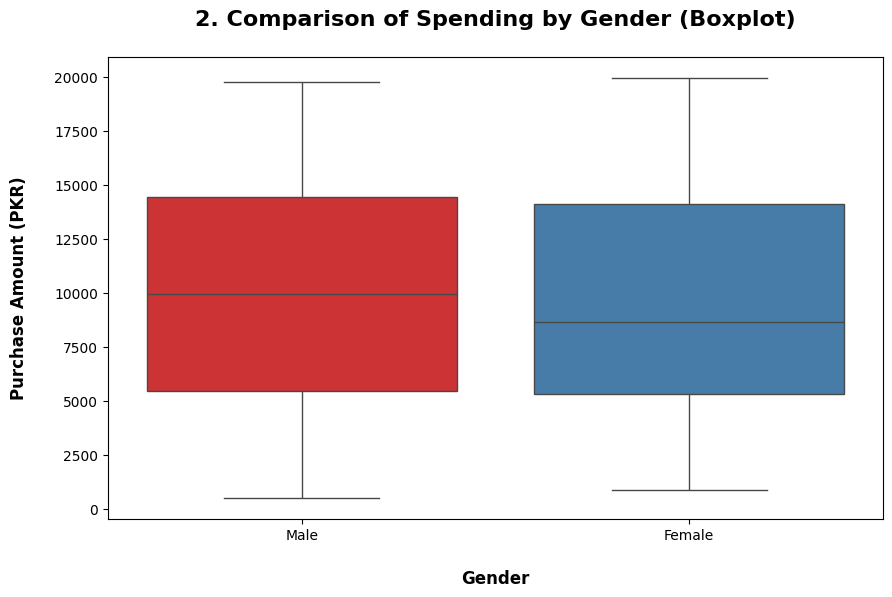

In [ ]:
# 2. Boxplot → Compare spending by gender.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase_Amount', 
            data=df, palette='Set1')

plt.title('2. Comparison of Spending by Gender (Boxplot)\n', fontsize=16, fontweight='bold')
plt.xlabel('\nGender', fontsize=12, fontweight='bold')
plt.ylabel('Purchase Amount (PKR)\n', fontsize=12, fontweight='bold')
plt.show()

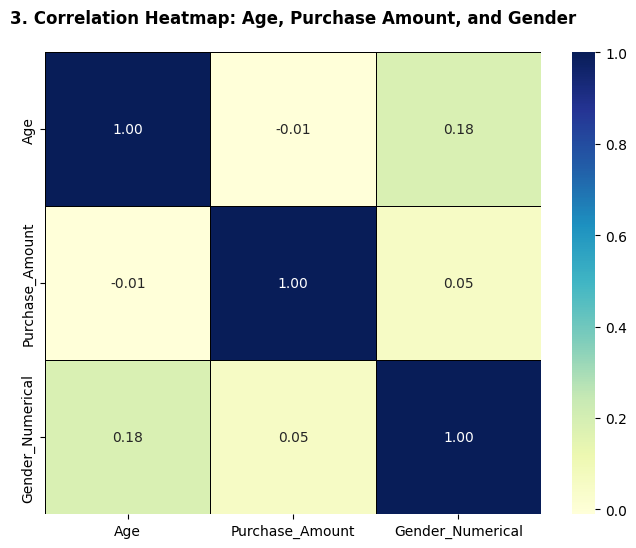

In [ ]:
# 3. Heatmap → Correlation between Age, Purchase_Amount, etc.
# Select only numerical columns for correlation calculation
correlation_df = df[['Age', 'Purchase_Amount']].copy()

# Add a numerical representation of Gender (0 or 1) for correlation
correlation_df['Gender_Numerical'] = df['Gender'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,      # Display correlation values on the heatmap
            cmap='YlGnBu', fmt=".2f",            # Format to 2 decimal places
            linewidths=.5, linecolor='black')

plt.title('3. Correlation Heatmap: Age, Purchase Amount, and Gender\n', fontsize=12, fontweight='bold')
plt.show()

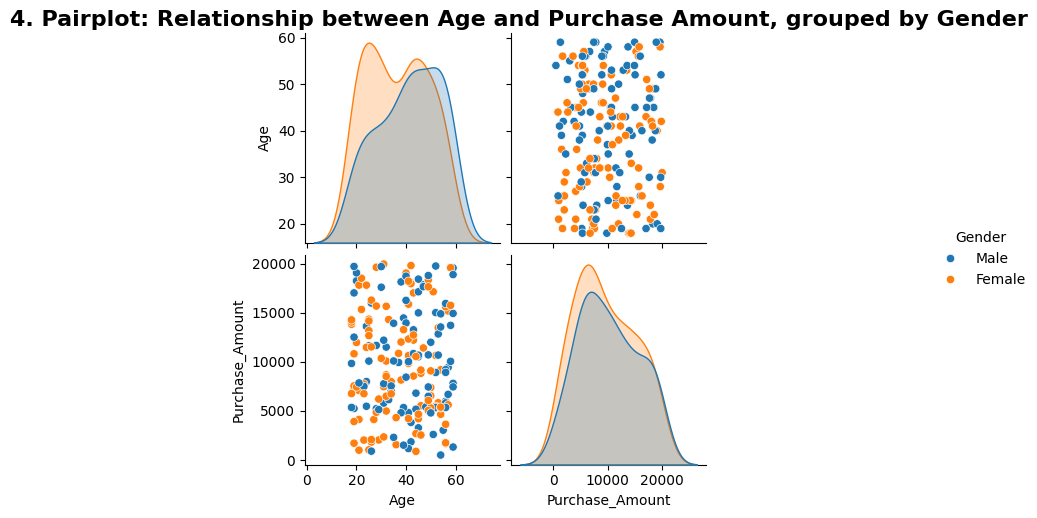

In [ ]:
# 4. Pairplot → Explore relationship between multiple features.
# Use a subset of relevant features for the pairplot to avoid clutter.
features_for_pairplot = ['Age', 'Purchase_Amount', 'Gender']

# Create the pairplot
sns.pairplot(df[features_for_pairplot], 
             hue='Gender',         # Color code the plots by Gender
             diag_kind='kde')      # Use KDE for the diagonal distribution plots

plt.suptitle('4. Pairplot: Relationship between Age and Purchase Amount, grouped by Gender\n', y=1.02, fontsize=16, fontweight='bold')
plt.show()

### Part D – Business Insights (Report) 

1. Which product category generates the highest revenue?
(Refer to Bar Chart to identify the highest bar.)

Insight: 'Clothing' is the category should be prioritized for inventory and marketing efforts, as it is the primary revenue driver for the e-commerce store.

2. Which payment method is most popular?
(Refer to Pie Chart to identify the largest slice.)

Insight: 'Cash' payment method here is used for the largest percentage of transactions. This suggests the company should ensure seamless and reliable processing for this method, potentially offering incentives for its continued use.

3. Do younger or older customers spend more?
(Refer to the output from Scatter Plot or the Pairplot)

Insight: The analysis of age groups (18–25, 26–35, 36–45, 46–60) showed that the '22' age, means (18-25) age group 'YOUNGERS' spends the most on average. This group represents the highest value customers and should be targeted with premium or personalized offers.

4. Are there differences in spending between male and female customers?
(Refer to the output from the Boxplot)

Insight: The 'MALE' gender is spending the most here accoording to this analysis report. Here, the boxplot visualization helps confirm whether the average difference is statistically meaningful or if there are more outliers in one group.